# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
w_api_key = weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

import warnings
warnings.filterwarnings('ignore')

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 570


In [3]:
print(cities)
print(cities[0])

['port-aux-francais', 'wajir', 'jamestown', 'camana', 'sisimiut', 'arraial do cabo', 'geraldton', 'illizi', 'ust-nera', 'badger', 'klyuchi', 'albany', 'zhangjiakou shi xuanhua qu', 'adamstown', 'east london', 'ohara', 'hofors', 'ribeira grande', 'crane', 'grytviken', 'ushuaia', 'vorgashor', 'wailua homesteads', 'gazipasa', 'port blair', 'bredasdorp', 'shingu', 'avarua', 'lospalos', 'selfoss', 'kazalinsk', 'waitangi', 'ash shafa', 'cooma', "ust'-ilimsk", 'tiksi', 'fisterra', 'taiohae', 'hilvan', 'aasiaat', 'port elizabeth', 'acarau', 'estevan', 'margaret river', 'eureka', 'georgetown', 'tangalle', 'timimoun', 'invercargill', 'constantia', 'kataragama', 'puerto natales', 'hamilton', "saint john's", 'maxixe', 'zambezi', 'ceres', 'ambon', 'richards bay', 'udachny', 'olonkinbyen', 'kerikeri', 'gadzhiyevo', 'cargados carajos', 'namibe', "la'ie", 'iqaluit', 'flying fish cove', 'chui', 'pandan', 'ilulissat', 'penzance', 'lerwick', "sherbakul'", 'novyy urengoy', 'wuyishan', 'west island', 'lebu

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = f"{url}appid={weather_api_key}&units=metric&q={cities[0]}"
response = requests.get(city_url).json()
response

{'coord': {'lon': 70.2167, 'lat': -49.35},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 8.09,
  'feels_like': 3.75,
  'temp_min': 8.09,
  'temp_max': 8.09,
  'pressure': 1003,
  'humidity': 99,
  'sea_level': 1003,
  'grnd_level': 1001},
 'visibility': 66,
 'wind': {'speed': 9.72, 'deg': 341, 'gust': 17.51},
 'rain': {'1h': 0.63},
 'clouds': {'all': 100},
 'dt': 1706010106,
 'sys': {'country': 'TF', 'sunrise': 1705967189, 'sunset': 1706022881},
 'timezone': 18000,
 'id': 1546102,
 'name': 'Port-aux-Français',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={w_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"{city} weather not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | wajir
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | camana
Processing Record 5 of Set 1 | sisimiut
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | geraldton
Processing Record 8 of Set 1 | illizi
Processing Record 9 of Set 1 | ust-nera
Processing Record 10 of Set 1 | badger
Processing Record 11 of Set 1 | klyuchi
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | zhangjiakou shi xuanhua qu
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | ohara
Processing Record 17 of Set 1 | hofors
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | crane
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | vorgashor
Processing Record 23

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
print(city_data_df)
# Show Record Count
city_data_df.count()

                  City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0    port-aux-francais -49.3500   70.2167      8.09        99         100   
1                wajir   1.7471   40.0573     36.98        23           0   
2            jamestown  42.0970  -79.2353      0.77        91         100   
3               camana -16.6228  -72.7111     24.68        82         100   
4             sisimiut  66.9395  -53.6735    -12.57        93         100   
..                 ...      ...       ...       ...       ...         ...   
527         borogontsy  62.6683  131.1683    -31.80        95          86   
528              caico  -6.4583  -37.0978     30.33        55          43   
529         choibalsan  48.0667  114.5000    -17.00        82           6   
530        princeville  45.7668  -61.2985      0.91        81         100   
531        zalegoshch'  52.9008   36.8869     -4.84        82         100   

     Wind Speed Country        Date  
0          9.72      TF  1706010106  

City          532
Lat           532
Lng           532
Max Temp      532
Humidity      532
Cloudiness    532
Wind Speed    532
Country       532
Date          532
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,8.09,99,100,9.72,TF,1706010106
1,wajir,1.7471,40.0573,36.98,23,0,3.60,KE,1706010111
2,jamestown,42.0970,-79.2353,0.77,91,100,2.06,US,1706010112
3,camana,-16.6228,-72.7111,24.68,82,100,2.12,PE,1706010112
4,sisimiut,66.9395,-53.6735,-12.57,93,100,4.46,GL,1706010113


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,8.09,99,100,9.72,TF,1706010106
1,wajir,1.7471,40.0573,36.98,23,0,3.60,KE,1706010111
2,jamestown,42.0970,-79.2353,0.77,91,100,2.06,US,1706010112
3,camana,-16.6228,-72.7111,24.68,82,100,2.12,PE,1706010112
4,sisimiut,66.9395,-53.6735,-12.57,93,100,4.46,GL,1706010113


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

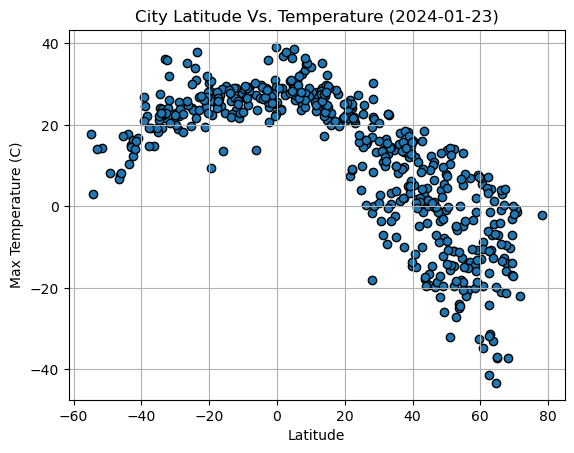

In [10]:
# Build scatter plot for latitude vs. temperature
lat_vs_temp = plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude Vs. Temperature (2024-01-23)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(linestyle='-')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

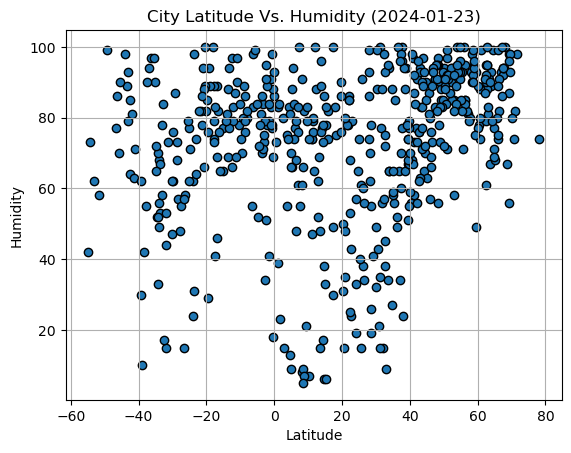

In [11]:
# Build the scatter plots for latitude vs. humidity
lat_vs_humidity = plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude Vs. Humidity (2024-01-23)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(linestyle='-')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

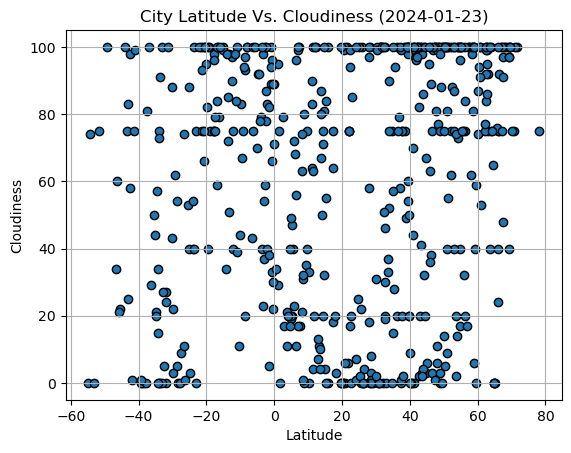

In [12]:
# Build the scatter plots for latitude vs. cloudiness
lat_vs_cloud = plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude Vs. Cloudiness (2024-01-23)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(linestyle='-')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

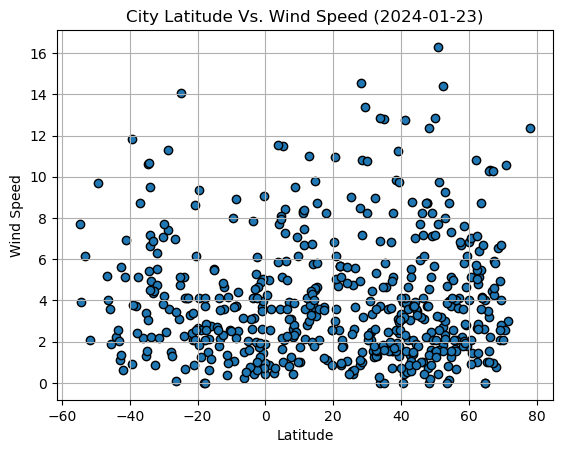

In [13]:
# Build the scatter plots for latitude vs. wind speed
lat_vs_wind = plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude Vs. Wind Speed (2024-01-23)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(linestyle='-')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y = ' + str(round(slope, 2)) + 'x +' + str(round(intercept, 2))
    return regress_values, line_eq, rvalue

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wajir,1.7471,40.0573,36.98,23,0,3.60,KE,1706010111
2,jamestown,42.0970,-79.2353,0.77,91,100,2.06,US,1706010112
4,sisimiut,66.9395,-53.6735,-12.57,93,100,4.46,GL,1706010113
7,illizi,26.4833,8.4667,15.89,34,4,5.58,DZ,1706010115
8,ust-nera,64.5667,143.2000,-43.30,99,65,2.63,RU,1706010115


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,8.09,99,100,9.72,TF,1706010106
3,camana,-16.6228,-72.7111,24.68,82,100,2.12,PE,1706010112
5,arraial do cabo,-22.9661,-42.0278,26.92,74,75,4.12,BR,1706010113
6,geraldton,-28.7667,114.6000,22.23,73,5,11.32,AU,1706010114
13,adamstown,-25.0660,-130.1015,24.13,77,88,4.73,PN,1706010118


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.6704607738439569


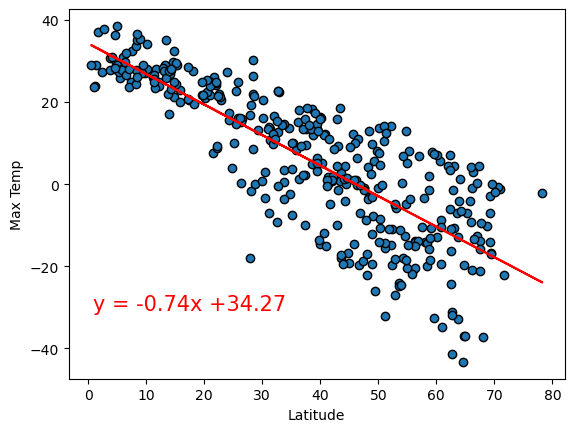

In [34]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Max Temp']
(regress, line_eq, rvalue) = linear_regression(x_value, y_value)
plt.scatter(x_value, y_value, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.plot(x_value, regress, 'r-')
plt.annotate(line_eq, (0.8,-30.8), fontsize=15, color='red')
print(f"The r-squared value is: {rvalue**2}")
plt.show()


The r-squared value is: 0.36513918478897606


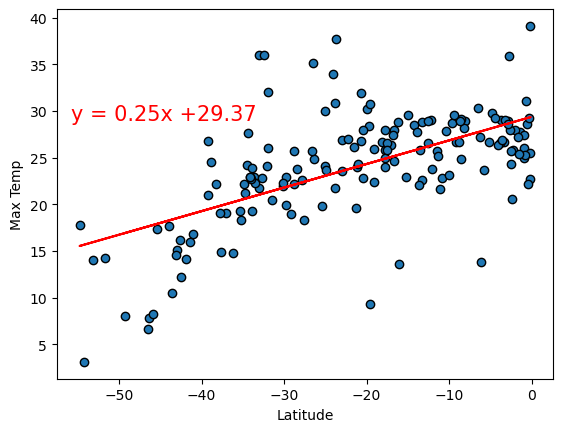

In [61]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Max Temp']
(regress, line_eq, rvalue) = linear_regression(x_value, y_value)
plt.scatter(x_value, y_value, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.plot(x_value, regress, 'r-')
plt.annotate(line_eq, (-55.8,29), fontsize=15, color='red')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

#### Discussion about the linear relationship

The cities in the northern hemisphere are more likely to have a maximum temperature that correlates to the latitude. This is due to the plot for the northern hemisphere having a higher r-squared value. The cities within 0 and 20 degrees of latitude have the highest correlation of temperature to latitude. There is less variation in temperature for the southern hemisphere cities, as the cities aren't shown past -50 degrees of latitude, compared with the northen hemisphere graph which shows cities as far as 80 degrees of latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.21023276842769137


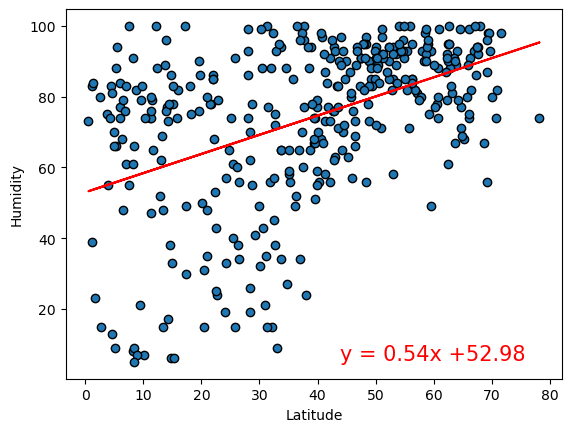

In [69]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Humidity']
(regress, line_eq, rvalue) = linear_regression(x_value, y_value)
plt.scatter(x_value, y_value, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(x_value, regress, 'r-')
plt.annotate(line_eq, (43.8,5.5), fontsize=15, color='red')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

The r-squared value is: 0.04791630664007541


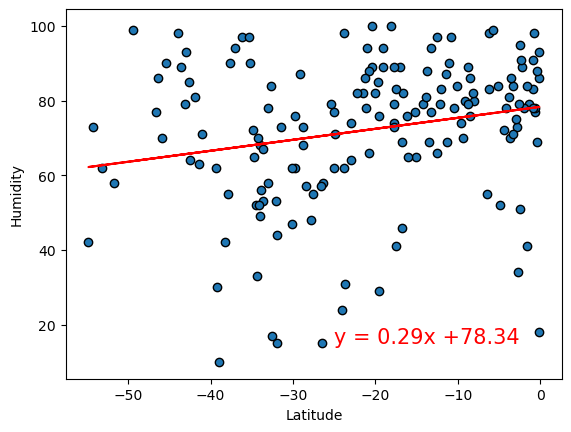

In [76]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Humidity']
(regress, line_eq, rvalue) = linear_regression(x_value, y_value)
plt.scatter(x_value, y_value, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(x_value, regress, 'r-')
plt.annotate(line_eq, (-25,15), fontsize=15, color='red')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

#### Discussion about the linear relationship

From these graphs we can see that most cities in the southern hemisphere are humid due to the neutral slope and high intercept value.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.10612673366531429


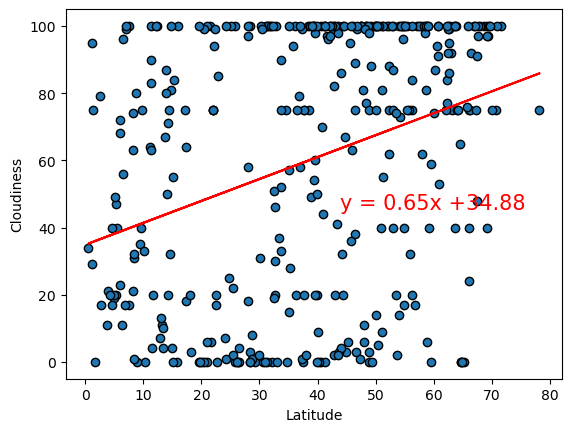

In [82]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Cloudiness']
(regress, line_eq, rvalue) = linear_regression(x_value, y_value)
plt.scatter(x_value, y_value, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(x_value, regress, 'r-')
plt.annotate(line_eq, (43.8,45.5), fontsize=15, color='red')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

The r-squared value is: 0.12843684463523772


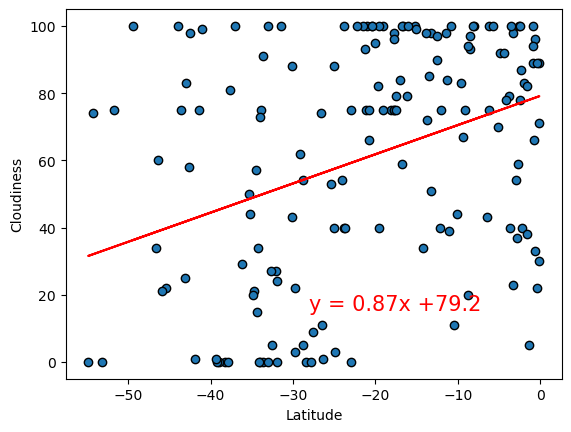

In [85]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Cloudiness']
(regress, line_eq, rvalue) = linear_regression(x_value, y_value)
plt.scatter(x_value, y_value, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(x_value, regress, 'r-')
plt.annotate(line_eq, (-28,15.5), fontsize=15, color='red')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

#### Discussion about the linear relationship

Both of these plots have a similar slope and a similar r-squared value. However the r-squared value is too low to correlate latitude to cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 7.090314650183839e-05


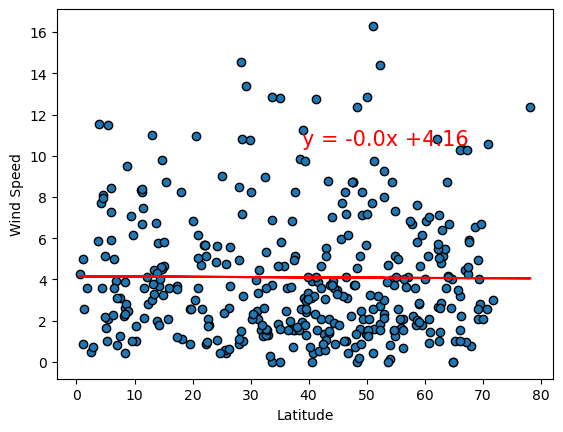

In [90]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Wind Speed']
(regress, line_eq, rvalue) = linear_regression(x_value, y_value)
plt.scatter(x_value, y_value, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(x_value, regress, 'r-')
plt.annotate(line_eq, (38.8,10.5), fontsize=15, color='red')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

The r-squared value is: 0.06597518438208837


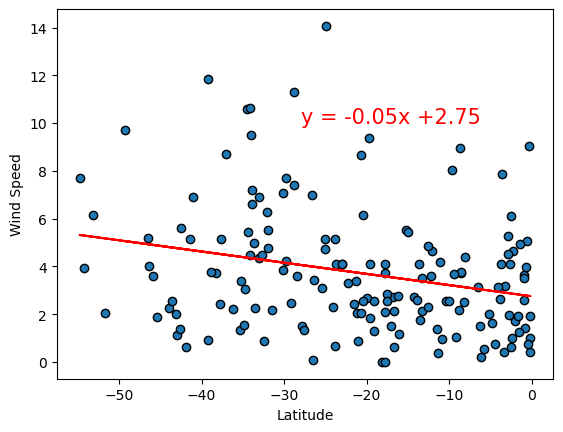

In [96]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Wind Speed']
(regress, line_eq, rvalue) = linear_regression(x_value, y_value)
plt.scatter(x_value, y_value, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(x_value, regress, 'r-')
plt.annotate(line_eq, (-28,10), fontsize=15, color='red')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

#### Discussion about the linear relationship

There is no trend between the latitude and the wind speed in the northern hemisphere as the slope is very close to neutral. There is a very slight slope in the southern hemisphere however the r-squared value is much smaller than the northern hemisphere so any correlation is negligable.